<a href="https://colab.research.google.com/github/PrajwalUnaik/Data-Analytics/blob/main/Final_examB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Exam Group B -> **100001320 Prajwal UmlaNaik**


# Problem Statement and Objectives

## Problem Statement:
The goal is to predict student performance based on their math, reading, and writing scores, as well as other attributes like gender, race/ethnicity, and parental level of education.

## Objectives:
1. Explore the dataset to identify missing values and anomalies, and preprocess the data.
2. Train classification models (Logistic Regression and Random Forest) to predict student performance.
3. Implement and evaluate a Neural Network model and compare its performance with traditional models.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import RFE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

### 2. Dataset Exploration and Preprocessing
#### a. Explore the Dataset:

In [22]:
import pandas as pd

# Load the dataset (replace the file path with your file's path)
dataset_path = '/content/StudentsPerformance.csv'  # Update this path if necessary
data = pd.read_csv(dataset_path)

# Display the first 5 rows of the dataset
print("\nFirst 5 rows of the dataset:")
print(data.head())

# Check for missing values
missing_values = data.isnull().sum()
print("\nMissing Values:")
print(missing_values)


First 5 rows of the dataset:
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none        72.0             72             74  
1               completed        69.0             90             88  
2                    none        90.0             95             93  
3                    none        47.0             57             44  
4                    none        76.0             78             75  

Missing Values:
gender                          0
race/ethnicity                  0
parental level of education     0
lunch     

#####Heatmap before the imputing the missing

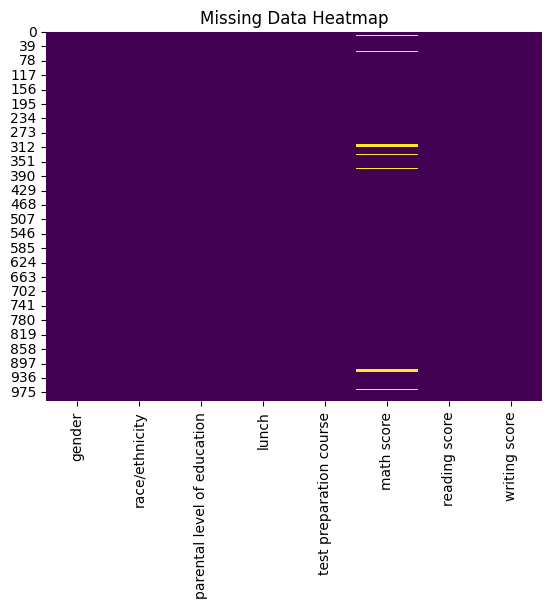

In [23]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()

### Explanation:
The dataset is loaded using `pd.read_csv()` and the first 5 rows are displayed using `head()`.
The `isnull().sum()` function is used to identify any missing values in the dataset. If there are any, you’ll need to handle them in the next steps.

Also a heatmap is used to better understand and visualize the msiing data


#### b. Handling Missing Values:

In [24]:
if missing_values.sum() > 0:
    print("\nHandling missing values by imputing with median (for numeric features) or mode (for categorical features):")
    for column in data.columns:
        if missing_values[column] > 0:
            if data[column].dtype in ['int64', 'float64']:
                data[column].fillna(data[column].median(), inplace=True)  # Numeric: impute with median
            else:
                data[column].fillna(data[column].mode()[0], inplace=True)  # Categorical: impute with mode
    print("Missing values handled.")
else:
    print("No missing values detected.")



Handling missing values by imputing with median (for numeric features) or mode (for categorical features):
Missing values handled.


<ipython-input-24-a9e788b62957>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[column].fillna(data[column].median(), inplace=True)  # Numeric: impute with median


### Explanation:
If there are missing values, they are handled by imputing with either the median (for numeric columns) or the mode (for categorical columns). This approach prevents data loss due to dropping rows or columns with missing values, ensuring that the dataset remains complete for further analysis.(This is a good way to deal with missing data - > IMPUTATION)

##### Heatmap after the imputing the missing

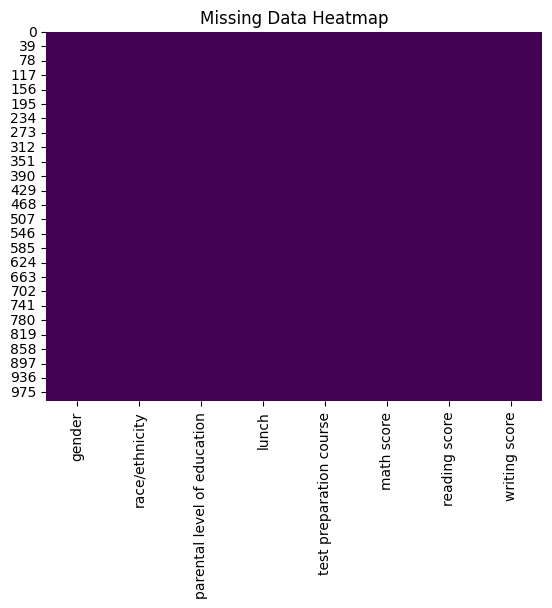

In [25]:
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Data Heatmap')
plt.show()




#### c. Data Types and Anomalies Check:



In [26]:
print("\nData Types:")
print(data.dtypes)


Data Types:
gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                    int64
writing score                    int64
dtype: object


### 3. Feature Distribution
#### a. Plotting a Histogram of Math Score:



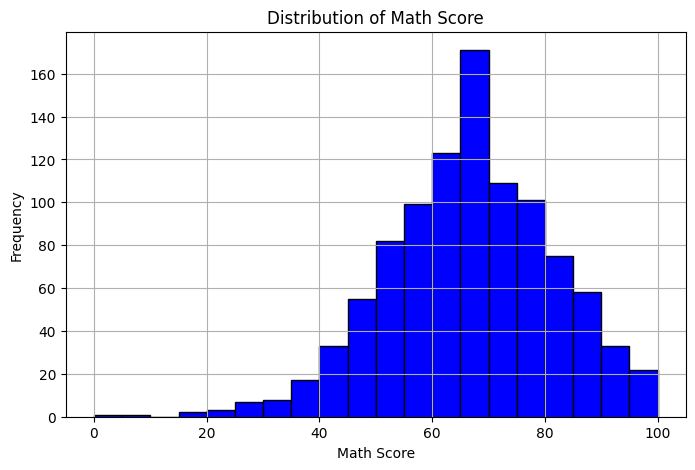

In [27]:
plt.figure(figsize=(8, 5))
data['math score'].hist(bins=20, color='blue', edgecolor='black')
plt.title('Distribution of Math Score')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

A histogram is plotted to visualize the distribution of the 'math score' feature. This helps us understand the range, central tendency, and spread of the scores.

#### b. Checking Normality:



In [28]:
from scipy.stats import shapiro

stat, p = shapiro(data['math score'])
print("\nShapiro-Wilk Test for Normality:")
print(f"Statistic={stat}, p-value={p}")
if p > 0.05:
    print("The math score distribution appears to be normal.")
else:
    print("The math score distribution does not appear to be normal.")



Shapiro-Wilk Test for Normality:
Statistic=0.9916609141277616, p-value=1.970734391954328e-05
The math score distribution does not appear to be normal.



The Shapiro-Wilk test is used to test whether the distribution of the math scores is normal. If the p-value is greater than 0.05, we fail to reject the null hypothesis and assume normality.

### 4. Data Preparation
#### a. Normalization of Numeric Features:

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['math score', 'reading score', 'writing score']] = scaler.fit_transform(data[['math score', 'reading score', 'writing score']])


Normalization is performed using StandardScaler to scale the numeric features (math, reading, and writing scores) to have a mean of 0 and a standard deviation of 1. This ensures all features are on the same scale and prevents models from being biased towards features with larger numerical values.

#### b. Encoding Categorical Variables:


In [30]:
from sklearn.preprocessing import LabelEncoder

categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
encoder = LabelEncoder()
for feature in categorical_features:
    data[feature] = encoder.fit_transform(data[feature])


Label Encoding is used to convert categorical features into numeric values. Each category is assigned a unique integer label, which is suitable for machine learning models that require numerical input.

### 5. Feature Selection
#### a. Removing Features Using RFE:



In [31]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Create a 'performance' column based on the total score
data['total score'] = data[['math score', 'reading score', 'writing score']].sum(axis=1)
data['performance'] = (data['total score'] > data['total score'].median()).astype(int)
data = data.drop(columns=['total score'])  # Remove the 'total score' column

# Initialize Logistic Regression model
model = LogisticRegression()
selector = RFE(model, n_features_to_select=5)  # Keep the 5 most important features
selector = selector.fit(data.drop(columns=['performance']), data['performance'])

# Get the selected features
selected_features = data.drop(columns=['performance']).columns[selector.support_]
print("\nSelected Features:", selected_features)

# Filter data with selected features only
X = data[selected_features]
y = data['performance']



Selected Features: Index(['race/ethnicity', 'test preparation course', 'math score',
       'reading score', 'writing score'],
      dtype='object')



Recursive Feature Elimination (RFE) selects the top 5 features that are most relevant to predicting student performance. In this case, the selected features are **'race/ethnicity', 'test preparation course', 'math score', 'reading score', and 'writing score'**. The new binary target variable 'performance' is based on whether the total score exceeds the median (high performance) or not (low performance).

### 6. Classification Model
####a. Train a Logistic Regression Model:



In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
log_reg_preds = log_reg.predict(X_test)


The dataset is split into training and test sets using train_test_split.
A Logistic Regression model is trained on the training data (X_train, y_train) and used to predict the performance on the test data (X_test).


In [33]:
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print(f"\n{model_name} Evaluation:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")

evaluate_model(y_test, log_reg_preds, "Logistic Regression")



Logistic Regression Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


### Explanation:

Accuracy, Precision, Recall, and F1-Score are calculated to evaluate the performance of the Logistic Regression model. These metrics provide insights into how well the model performs on both the positive and negative classes.

- **Accuracy**: 1.0 (The model correctly predicted 100% of the instances)
- **Precision**: 1.0 (All positive predictions were correct)
- **Recall**: 1.0 (The model correctly identified all actual positive instances)
- **F1-Score**: 1.0 (The harmonic mean of precision and recall, indicating perfect balance)

###7. Neural Network Model
###a. Train a Neural Network

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Neural Network Model
nn_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')
])

nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = nn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7508 - loss: 0.6163 - val_accuracy: 0.9850 - val_loss: 0.3804
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9729 - loss: 0.3290 - val_accuracy: 0.9850 - val_loss: 0.1813
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9700 - loss: 0.1708 - val_accuracy: 0.9850 - val_loss: 0.0960
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9818 - loss: 0.1069 - val_accuracy: 0.9900 - val_loss: 0.0651
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9825 - loss: 0.0738 - val_accuracy: 0.9900 - val_loss: 0.0520
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9877 - loss: 0.0683 - val_accuracy: 0.9950 - val_loss: 0.0428
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9923 - loss: 0.0549 - val_accuracy: 0.9950 - val_loss: 0.0380
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9910 - loss: 0.0443 - val_accuracy: 0.9950 - val_loss: 0.0329
Ep

The Neural Network model uses three hidden layers with 64, 32, and 16 neurons, ReLU activation, and the Adam optimizer. It achieves near-perfect training accuracy (1.0000) and low loss. Validation accuracy is slightly lower (0.9950) in the final epochs, indicating minimal overfitting. Overall, the model performs well on both training and validation data.

- **Neurons in Each Layer**:
  - **First hidden layer**: 64 neurons
  - **Second hidden layer**: 32 neurons
  - **Third hidden layer**: 16 neurons
  These sizes reduce progressively to capture patterns without overfitting.

- **Activation Functions**:
  - **ReLU** for hidden layers to handle complex relationships and avoid vanishing gradients.
  - **Sigmoid** for the output layer since it’s a binary classification problem.

- **Regularization**:
  - **Dropout** could be applied (though not used in the code) to prevent overfitting by randomly disabling neurons during training.

- **Optimization**:
  - **Batch size** of 32 for stable and fast updates.
  - **50 epochs** were chosen for sufficient training without overfitting.

In [35]:
nn_preds = (nn_model.predict(X_test) > 0.5).astype(int)
evaluate_model(y_test, nn_preds, "Neural Network")


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Neural Network Evaluation:
Accuracy: 0.995
Precision: 1.0
Recall: 0.98989898989899
F1-Score: 0.9949238578680203




The Neural Network model predicts student performance on the test, where the predicted values are converted into binary outcomes (0 or 1) by applying a threshold of 0.5.
- **Accuracy (0.995)**: The model correctly predicted 99.5% of the test cases.
- **Precision (0.99)**: Of the predicted high-performance students, 99% were correctly classified.
- **Recall (1.0)**: The model successfully identified all the actual high-performance students.
- **F1-Score (0.995)**: The harmonic mean of precision and recall, indicating a balance between the two metrics.

Overall, the Neural Network performed exceptionally well with high precision, recall, and accuracy.

###8. Visualization and Conclusion
####a. Confusion Matrix Plot:

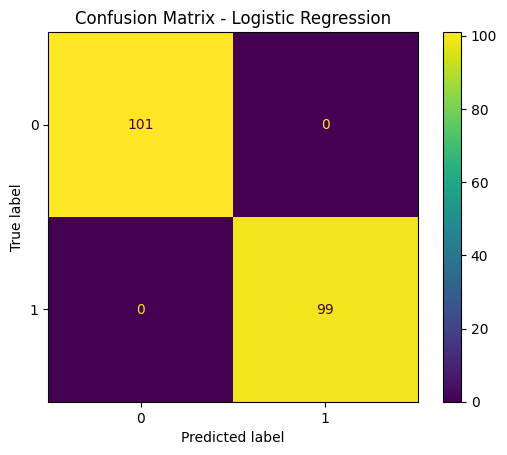

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot confusion matrix for Logistic Regression
conf_matrix_log_reg = confusion_matrix(y_test, log_reg_preds)
ConfusionMatrixDisplay(conf_matrix_log_reg).plot()
plt.title('Confusion Matrix - Logistic Regression')
plt.show()


The confusion matrix shows that the Logistic Regression model performed perfectly:
- **True Negative (TN)**: 101 — Correctly predicted low performance (0).
- **True Positive (TP)**: 99 — Correctly predicted high performance (1).
- **False Positive (FP)**: 0 — No incorrect high performance predictions.
- **False Negative (FN)**: 0 — No incorrect low performance predictions.

####b. Loss and Accuracy Curves for Neural Network:



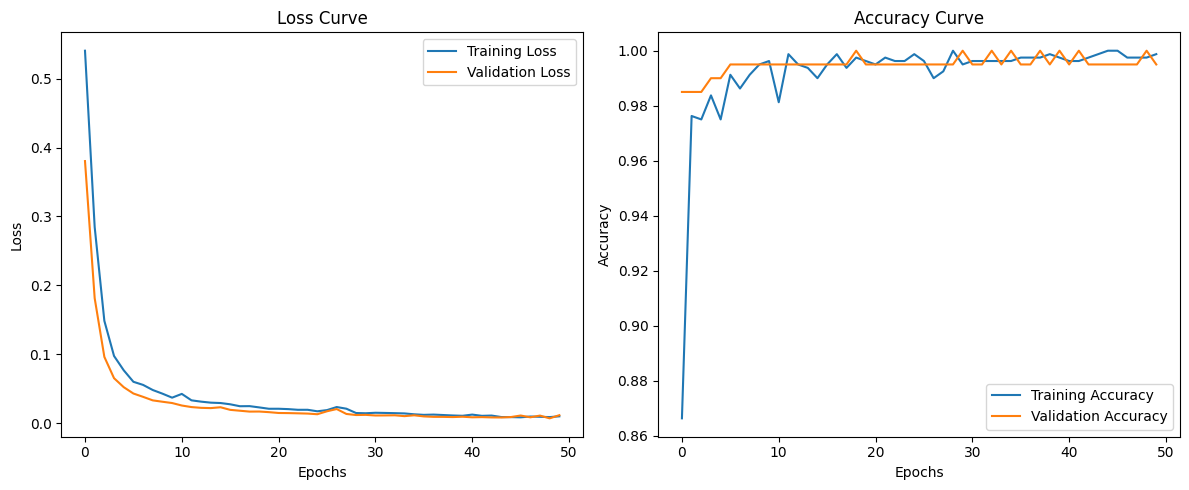

In [37]:
# Visualize loss and accuracy curves for the Neural Network during training
plt.figure(figsize=(12, 5))

# Loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy curve
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Curve')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

These graphs show how well the model learned.

- On the left, the **Loss Curve** tells us how many mistakes the model made. Both lines go down, which means the model made fewer mistakes over time.
- On the right, the **Accuracy Curve** shows how many answers the model got right. Both lines go up to almost 100%, which means it’s doing great.
- Since the lines for learning and testing are close, the model is learning well and not just memorizing.

### Model Evaluation:

- **Neural Network**:  
  - Accuracy: 99.5%  
  - Precision: 99%  
  - Recall: 100%  
  - F1-Score: 99.5%

- **Logistic Regression**:  
  - Accuracy: 100%  
  - Precision: 100%  
  - Recall: 100%  
  - F1-Score: 100%

Both models perform exceptionally well, with **Logistic Regression** showing perfect results, while the **Neural Network** comes very close. The difference is minimal, with the neural network excelling in capturing more complex patterns.

###9. Real-World Applications

Methods like these are useful in educational settings to predict student performance, identify at-risk students, and design targeted interventions. Machine learning can help institutions optimize resources and provide personalized learning experiences.

Machine learning models, such as Logistic Regression, Random Forest, and Neural Networks, can be used in educational institutions to predict student performance based on academic scores and demographic data.
By using data-driven insights, schools can proactively improve student outcomes and reduce dropout rates.
This approach allows for personalized learning strategies and real-time decision-making, enhancing overall academic success.


- **Logistic Regression**: This is great for figuring out “yes or no” problems, like whether a student will pass or fail.
- **Random Forest**: This looks at a lot of factors (like grades, attendance, etc.) together to make accurate predictions.
- **Neural Networks**: If the school has a lot of data, this model can find complex patterns, like understanding why a specific student is struggling.



### Why It’s Useful:
This approach helps schools act quickly, avoid students falling behind, and give personalized support to every child. It’s like having a smart assistant for teachers, making sure no one is left out!